In [174]:
import numpy as np
import pandas as pd

In [175]:
yields_hist=pd.read_csv('C:/Users/claud/OneDrive/Escritorio/SwissGovYields.csv',index_col=0)/100

df=yields_hist.diff().dropna()
cov_matrix=df.cov()
l, A=np.linalg.eig(cov_matrix)

expl=l/l.sum()
expl.cumsum()[1]*100

94.4923416119997

In [176]:
yield_curve=yields_hist.loc['2010 07']/100
y=[2,3,4,5]
CF=[80,70,150,40]

yields = yield_curve.iloc[0:4]

portfolio = pd.DataFrame({'Year': y, 'CF': CF, 'Yield': yields})

The answer to the question is 2.02
--------------------------------------------------------
 


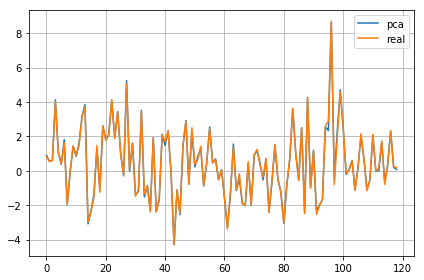

In [185]:
mean_changes = np.array(df.mean(axis = 0))

# demeaned changes in euklidean space
X = changes.sub(mean_changes)

# demeand changes in eigen space
Y = np.dot(X, A)

Y_reduced = Y[:,0:2]
A_reduced = A[:,0:2]
A_reduced_transposed = A_reduced.transpose()

X1 = np.dot(Y_reduced, A_reduced_transposed)

dy = X1 + mean_changes

pca = dy[:,0:4]

dt = 1./12

partial_t = sum(portfolio.Yield.values * portfolio.CF.values * np.exp(- portfolio.Year.values * portfolio.Yield.values))
partial_y = - portfolio.CF.values * portfolio.Year.values * np.exp(- portfolio.Year.values * portfolio.Yield.values)

sum(portfolio.CF.values * np.exp(-portfolio.Yield.values * portfolio.Year.values ))

dV = partial_t * dt + np.dot(pca,partial_y)

answer1 = dV.std()


real_changes = np.dot(changes.iloc[:,0:4] ,partial_y)
real_changes += partial_t * dt


print('The answer to the question is {:.2f}'.format(answer1))
print('--------------------------------------------------------')
print(' ')

plt.plot(dV, label = 'pca')
plt.plot(real_changes, label = 'real')
plt.grid()
plt.legend()
plt.tight_layout()


